In [1]:
import os
os.chdir('/data/l989o/deployed/a/')
print(os.getcwd())
from jupy import *

/data/l989o/deployed/a


In [74]:
from data import RawMeanDataset
import torch
import matplotlib.pyplot as plt
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          'text.color' : 'k',
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update(params)

In [ ]:
ds = RawMeanDataset('train')
l = []
cells = []
for x in ds:
    xx = torch.mean(x, dim=0).view(1, -1)
    l.append(xx)
    cells.append(x.shape[0])
x = torch.cat(l, dim=0)
print(x.shape)
x = torch.log(x + 1)
mu, std = torch.mean(x, dim=0), torch.std(x, dim=0)
x = (x - mu) / std

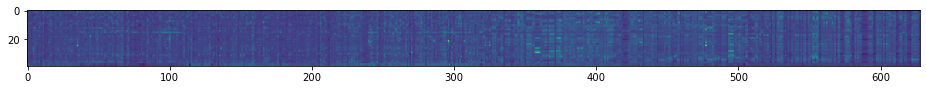

In [13]:
plt.figure(figsize=(16, 9))
plt.imshow(x.t())
plt.show()

In [75]:
import os

os.makedirs('data/spatial_uzh_processed/a/', exist_ok=True)


def plt_show(plt, filename):
    f = os.path.join('data/spatial_uzh_processed/a', filename)
    print('saving figure in', f)
    plt.savefig(f)
    plt.show()

saving figure in data/spatial_uzh_processed/a/cells_cutoff.png


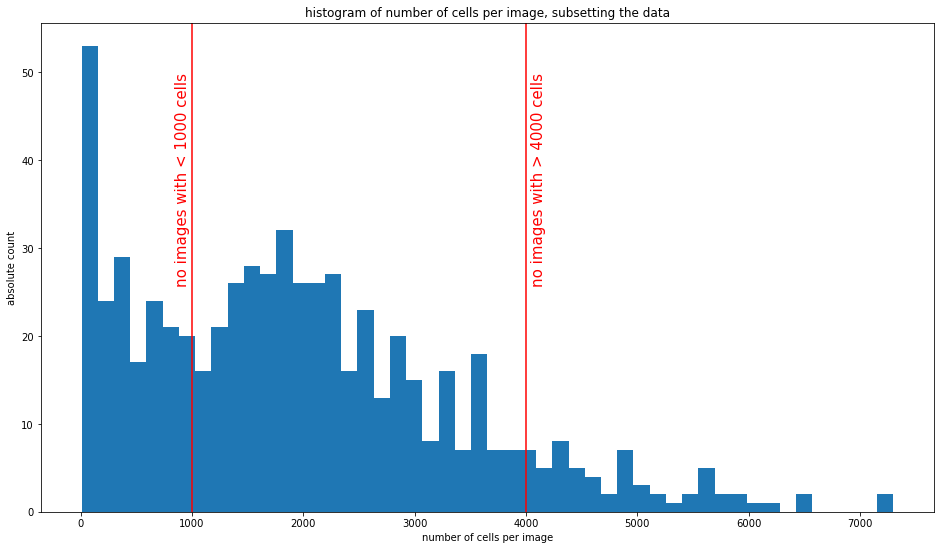

In [76]:
cells = np.array(cells)
plt.figure(figsize=(16, 9))
plt.hist(cells, bins=50)
a = 1000
b = 4000
plt.axvline(a, c='r')
plt.text(a - 150,50,f'no images with < {a} cells',rotation=90, c='r', verticalalignment='top', fontsize=15)
plt.axvline(b, c='r')
plt.xlabel('number of cells per image')
plt.text(b + 45,50,f'no images with > {b} cells',rotation=90, c='r', verticalalignment='top', fontsize=15)
plt.ylabel('absolute count')
plt.title('histogram of number of cells per image, subsetting the data')
plt_show(plt, 'cells_cutoff.png')

In [52]:
train_ok = []
for s, x in zip(train, RawMeanDataset('train')):
    n = x.shape[0]
    if n >= a and n <= b:
        train_ok.append(s)
print(len(train_ok),'out of', len(train),'has been kept')

validation_ok = []
for s, x in zip(validation, RawMeanDataset('validation')):
    n = x.shape[0]
    if n >= a and n <= b:
        validation_ok.append(s)
print(len(validation_ok),'out of', len(validation),'has been kept')

filter_cells = []
for s, x in zip(test, RawMeanDataset('test')):
    n = x.shape[0]
    if n >= a and n <= b:
        test_ok.append(s)
print(len(test_ok),'out of', len(test),'has been kept')

389 out of 628 has been kept
45 out of 70 has been kept
18 out of 37 has been kept


In [59]:
print(len(test_ok))
print(test_ok)


18
['BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20170905_121_100_X15Y5_252_a0_full.tiff', 'BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20170905_122_166_X15Y4_231_a0_full.tiff', 'BaselTMA_SP41_23.475kx17.66ky_10000x5000_12_20170905_56_62_X7Y7_108_a0_full.tiff', 'BaselTMA_SP41_23.475kx17.66ky_10000x5000_12_20170905_64_219_X8Y7_120_a0_full.tiff', 'BaselTMA_SP41_33.475kx17.665ky_8500x5000_13_20170905_4_216_X1Y6_12_a0_full.tiff', 'BaselTMA_SP42_26.8kx12.885ky_7000x7000_6_20179015_94_6_X11Y1_196_a0_full.tiff', 'BaselTMA_SP42_32.435kx20.41ky_7000x7000_11_20179015_58_185_X7Y5_205_a0_full.tiff', 'BaselTMA_SP43_10.3kx13.7ky_6500x8000_6_20170928_14_144_X16Y1_301_a0_full.tiff', 'BaselTMA_SP43_10.3kx13.7ky_6500x8000_6_20170928_50_131_X14Y4_156_a0_full.tiff', 'BaselTMA_SP43_10.3kx13.7ky_6500x8000_6_20170928_59_131_X13Y4_60_a0_full.tiff', 'BaselTMA_SP43_29.3kx15.5ky_7000x8000_3_20170928_31_250_X1Y3_33_a0_full.tiff', 'BaselTMA_SP43_29.3kx15.5ky_7000x8000_3_20170928_32_250_X2Y3_129_a0_full.tiff', 'ZTM